In [48]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir ='C:\Users\Fran\Documents\MScProject\workspace\MultiFile\multifile_lda'
sys.path.append(basedir)
sys.path.append ('C:\Users\Fran\Anaconda2\envs\ipykernel_py2\Lib\site-packages')
import sys
import numpy as np
import pickle # for loading dictionary

import pylab as plt
import plotly.plotly as py
import seaborn as sns

#from multifile_analysis import MultifileAnalysis
#from multifile_viz import MultifileLDAViz
#from multifile_lda import MultifileLDA
from lda_topicmodel import TopicModel
from lda_annotate import Word,Topic,Annotation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
dict_file = '/Users/Fran/Dropbox/beer_analysis/large_study/Beer_mzXML_large_study/beer_v_urine.dict'

a = TopicModel(dict_file, model_type='nb')

In [100]:
annoFiles = ['urine.csv','beer.csv']
#annoFiles = ['beer.csv']
anno = Annotation(annoFiles, ['U_','B_'])
hits = anno.get_hits(a,score_threshold = 0.5)
anno.write_csv(hits,'B_U_New_ST_0.5.csv')


[autoreload of lda_annotate failed: Traceback (most recent call last):
  File "C:\Users\Fran\Anaconda2\lib\site-packages\IPython\extensions\autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Fran\Documents\MScProject\workspace\MultiFile\multifile_lda\lda_annotate.py", line 248
    
    ^
SyntaxError: invalid syntax
]


 Total number of 188 annotataions written to B_U_New_ST_0.5.csv for 300 topics


In [ ]:
interesting = [128, 259,   9]
anno.display_hits(a,interesting)

In [12]:
interesting = [128, 259,  264, 9, 13, 18, 19, 152, 282, 30]# 287, 289, 293, 172, 301, 302, 189, 58, 61, 
#               192, 66, 71, 75, 204, 77, 80, 338, 85, 343, 90, 349, 102, 106, 317, 113, 371, 246, 380, 234]
#interesting =[360]
all_hits = anno.get_hits(a,topics = interesting)

for k,h in all_hits.items():   
    if len(h['hits']) > 0:  
        m_w  = ['{}_{}'.format(t,m) for (ppm,m,p,t) in h['model_words'] if p > 0.01]
            
        
        print  "\n\n"," Topic " , k,  " hits" ,len(h['hits']),'\n Model Words:', m_w
        #print h['hits'].values()
        for an,a in h['hits'].items():
            print  "\n Score:",a['score'],'number of words matching',a['count'], a['words']
            print an
    



 Topic  259  hits 2 
 Model Words: ['Frag_100.0757', 'Frag_72.04447', 'Frag_56.04984', 'Loss_101.08394', 'Loss_104.04719', 'Loss_70.01657']

 Score: 0.837919759428 number of words matching 1 [0]
B_Unclear yet what these fragments relate to.: Frag 260.113412316 (C11H18NO6),Frag 128.071153571 (C6H10NO2),Frag 242.10284763 (C11H16NO5),Frag 100.076238949 (C5H10NO),

 Score: 0.861693227838 number of words matching 2 [0, 1]
U_Mass2Motif related to acetylamine substructure ? e.g., as in N1-acetylspermidine; the C5H10NO is a ring fragment including the N-acetyl group: Frag 100.076238949 (C5H10NO),Frag 72.0449388202 (C3H6NO),


 Topic  264  hits 4 
 Model Words: ['Frag_95.06032', 'Frag_68.04961', 'Loss_44.9976', 'Loss_40.98777', 'Loss_46.00543', 'Frag_54.03419', 'Loss_87.03195']

 Score: 0.826127681916 number of words matching 1 [0]
B_Fragments indicative for histidine (C6H10N3O2) substructure (MzCloud): Frag 110.071822273 (C5H8N3),Frag 156.077301581 (C6H10N3O2),Frag 93.0452731712 (C5H5N2),Fra

In [18]:
print a.K
print 'dict' , len (a.topic_dict)
print 'alphas', a.alphas.shape

300
<type 'dict'> 300
alphas (41L, 300L)


In [13]:
#alphas_exp = np.divide(a.alphas, a.alphas.sum(axis = 0)[None,:])
alphas_exp = np.divide(a.alphas, a.alphas.sum(axis = 1)[:,None])

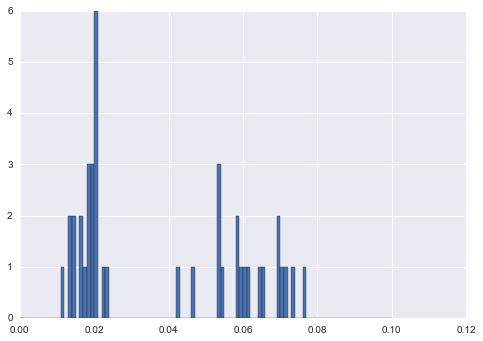

In [23]:
plt.hist(a.alphas[:,127],bins = 100,range = (0,0.1))
plt.show()

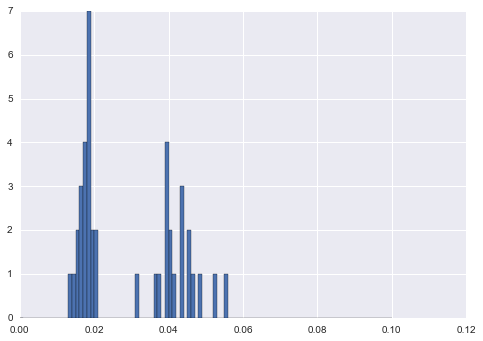

In [25]:
plt.hist(alphas_exp[:,127],bins = 100,range = (0,0.1))
plt.show()

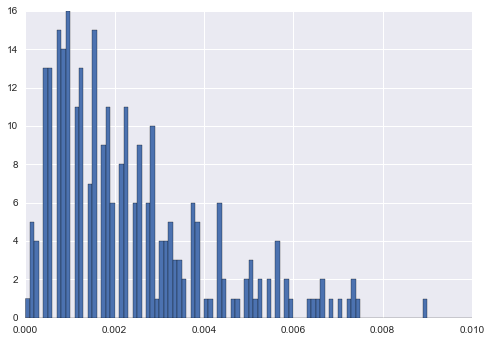

In [27]:
plt.hist(alphas_exp[5,:],bins = 100,range = (0,0.01))
plt.show()

In [57]:
sampleID = a.sampleIDs
alphas = a.alphas
N=  (alphas.shape[0])
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour. 
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
data = [{
    'y': alphas[i,:], 
    'name':sampleID[i],
    'type':'box',
    'marker':{'color': c[i]}
    } for i in range(N)]

# format the layout
layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'title': 'Mean alphas ',
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          }

py.iplot(data)


In [16]:
sampleID = a.sampleIDs
alphas = alphas_exp
N=  (alphas.shape[0])
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour. 
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
data = [{
    'y': alphas[i,:], 
    'name':sampleID[i],
    'type':'box',
    'marker':{'color': c[i]}
    } for i in range(N)]

# format the layout
layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'title': 'Mean alphas ',
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          }

py.iplot(data)


In [46]:
b= TopicModel('results/beer_urine.project', model_type='gs')

Project loaded from results/13_files_separate_mode_method1_POS.project time taken = 27.4029663586
Sun Jun 12 18:04:40 2016 Multi-file analysis of 13 urine files in separate mode method 1 POS


In [25]:
print b.K
print 'dict' , len (b.topic_dict)
print 'alphas', b.alphas.shape


300
dict 300
alphas (13L, 300L)


In [48]:
a_text = a.get_topic_text()
print len(a_text)
print len(a_text)
for t in  a_text:
    print a_text[t]



300
300
topic_motif_0 : 0.800930091621
loss_181.0948 : 0.138
fragment_200.12773 : 0.116
fragment_225.12263 : 0.113
loss_84.04195 : 0.106
fragment_128.07043 : 0.094
loss_134.05703 : 0.048
fragment_273.14557 : 0.043
fragment_56.04984 : 0.038
fragment_81.0335 : 0.034
loss_36.02101 : 0.024
fragment_291.15548 : 0.018
fragment_130.08598 : 0.014
loss_148.07346 : 0.013

topic_motif_1 : 0.813339536553
loss_101.04767 : 0.450
loss_168.09988 : 0.201
fragment_131.11784 : 0.062
fragment_186.07593 : 0.057
fragment_73.06479 : 0.043

topic_motif_2 : 0.803956399701
fragment_127.03885 : 0.505
loss_194.12626 : 0.100
fragment_99.04393 : 0.060
loss_134.10527 : 0.053
fragment_73.06479 : 0.040
loss_130.13109 : 0.025
fragment_109.02819 : 0.021

topic_motif_3 : 0.802973364507
fragment_98.98423 : 0.425
loss_102.06789 : 0.237
loss_148.07346 : 0.095
loss_97.97703 : 0.046

topic_motif_4 : 0.557128974757
loss_18.01047 : 0.149
fragment_79.0541 : 0.067
loss_32.02612 : 0.042
loss_141.04608 : 0.034
fragment_381.07809 : 

In [49]:
b_text = b.get_topic_text()
print len(b_text)

for t in  b_text:
    print b_text[t]


300
topic_motif_0 : 0.856843249498
fragment_84.04451 : 0.436
fragment_130.05031 : 0.421

topic_motif_1 : 0.545075352577
loss_118.04137 : 0.138
loss_57.05787 : 0.075
fragment_67.63152 : 0.067
fragment_182.04929 : 0.053
loss_132.01954 : 0.051
fragment_182.04713 : 0.032
loss_170.03567 : 0.031
loss_125.99863 : 0.026
fragment_136.04282 : 0.020
loss_142.00474 : 0.020
loss_151.03016 : 0.014
loss_156.02016 : 0.010
fragment_177.13941 : 0.009

topic_motif_2 : 0.813076525338
loss_44.02604 : 0.792
loss_32.02573 : 0.021

topic_motif_3 : 0.801990296591
fragment_95.06059 : 0.802

topic_motif_4 : 0.773221602276
fragment_140.01676 : 0.264
fragment_96.04428 : 0.081
fragment_208.04359 : 0.080
fragment_182.02669 : 0.071
fragment_166.03165 : 0.064
loss_173.06839 : 0.040
fragment_271.07408 : 0.033
loss_147.05298 : 0.028
loss_189.06341 : 0.027
fragment_149.00596 : 0.017
fragment_112.02177 : 0.017
fragment_121.01064 : 0.016
loss_175.03009 : 0.014
loss_184.99918 : 0.010
fragment_225.06917 : 0.010

topic_motif_

In [50]:
print a.alphas.shape
print b.alphas.shape

(41L, 300L)
(13L, 300L)
